In [28]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

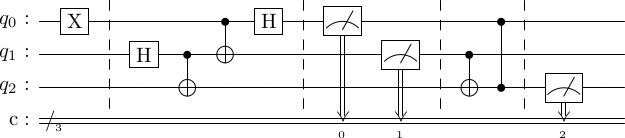

In [34]:
# define quantum circuit
qc = QuantumCircuit(3,3)

# initialize q_0 (we will be teleporting q_0 to q_2)
qc.x(0)

qc.barrier()

# Part 1: 
qc.h(1)
qc.cx(1,2)
qc.cx(0,1)
qc.h(0)

qc.barrier()

# Part 2: measure the circuit at q_0 and q_1
qc.measure(0,0)
qc.measure(1,1)

qc.barrier()

# Part 2: 
qc.cx(1,2)
qc.cz(0,2)

qc.barrier()

# Part 2: 
qc.measure(2,2)

# draw the circuit
qc.draw('latex')

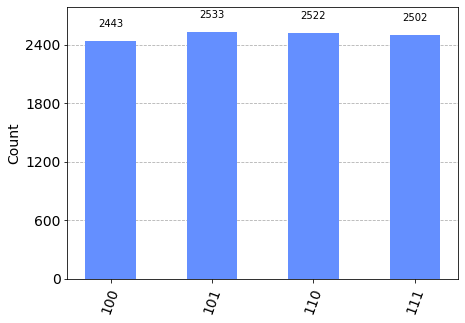

In [36]:
# verify that q_0 teleports to q_2 (first number in sequence corresponds to q_2, check that it matches initial state of q_0)

counts = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots = 10000).result().get_counts()

plot_histogram(counts)